In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf



In [3]:
start='2013-01-01'
end='2024-06-02'
stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2868,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600
2869,2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
2870,2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15023800
2871,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

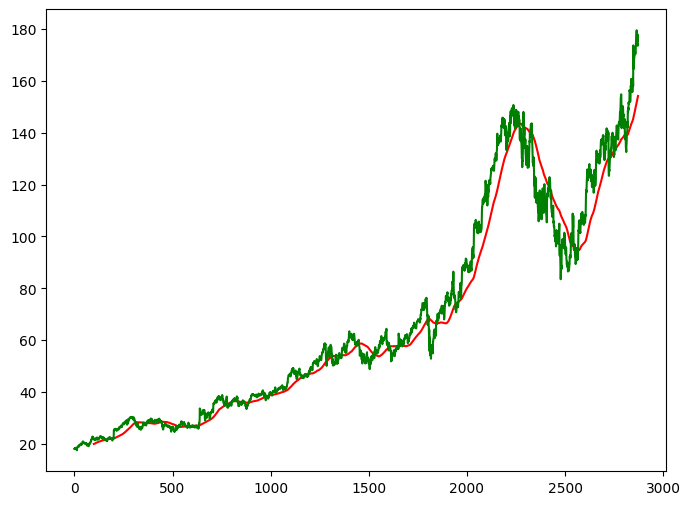

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days=data.Close.rolling(200).mean()

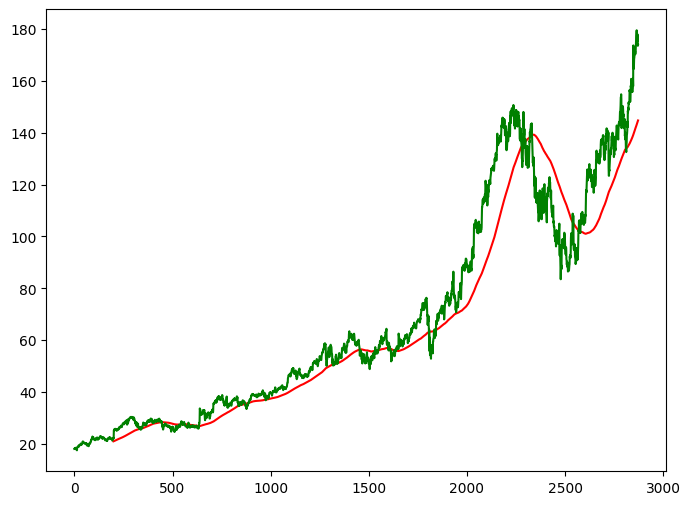

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape[0]

2298

In [13]:
data_test.shape[0]

575

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale=scaler.fit_transform(data_train)

In [16]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
from keras.layers import Dense,Dropout,LSTM
from keras import Sequential

In [18]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
x,y=np.array(x),np.array(y)

In [21]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [24]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - loss: 0.0610
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0059
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 234ms/step - loss: 0.0040
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - loss: 0.0038
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - loss: 0.0032
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - loss: 0.0033
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 0.0037
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 0.0029
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0026
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0034
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 0.0029
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.0027
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.0033
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.0020
Epoch 15/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [29]:
pas_100_days=data_train.tail(100)

In [30]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [60]:
data_test_scale=scaler.fit_transform(data_test)

In [61]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [62]:
y_predict=model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [68]:
scale=1/scaler.scale_

In [64]:
y_predict=y_predict*scale

In [65]:
y=y*scale

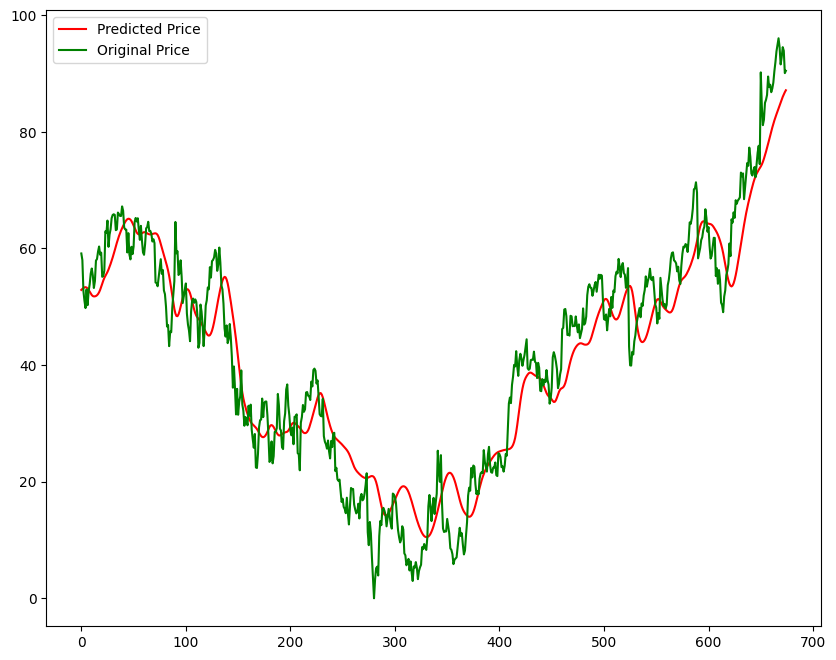

In [69]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel=('Time')
plt.ylabel=('Price')
plt.legend()
plt.show()

In [71]:
model.save('stock predictions model.keras')

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [39]:
x_train_rf = x.reshape((x.shape[0], x.shape[1] * x.shape[2]))
x_test_rf = x.reshape((x.shape[0], x.shape[1] * x.shape[2]))

In [40]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train_rf, y)

RandomForestRegressor()

In [41]:
y_pred_rf = rf_model.predict(x_test_rf)

In [42]:
y_pred_rf_rescaled = y_pred_rf * (1 / scaler.scale_[0])
y_test_rescaled = y * (1 / scaler.scale_[0])

In [43]:
mse_rf = mean_squared_error(y_test_rescaled, y_pred_rf_rescaled)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Random Forest Mean Squared Error: 9251.036316275324


In [45]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 495.5 kB/s eta 0:03:22
   ---------------------------------------- 0.1/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 731.4 kB/s eta 0:02:17
   ---------------------------------------- 0.1/99.8 MB 731.4 kB/s eta 0:02:17
   ---------------------------------------- 0.2/99.8 MB 700.2 kB/s eta 0:02:23
   ---------------------------------------- 0.3/99.8 MB 911.0 kB/s eta 0:01:50
   ---------------------------------------- 0.3/99.8 MB 999.9 kB/s eta 0:01:40
   ---------------------------------------- 0.3/99.8 MB 884.2 kB/s eta 0:01:53
   --------------------

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [47]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(x_train_rf, y)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [48]:
y_pred_xgb = xg_reg.predict(x_test_rf)


In [49]:
y_pred_xgb_rescaled = y_pred_xgb * (1 / scaler.scale_[0])


In [50]:
mse_xgb = mean_squared_error(y_test_rescaled, y_pred_xgb_rescaled)
print(f'XGBoost Mean Squared Error: {mse_xgb}')

XGBoost Mean Squared Error: 7190.093019308427


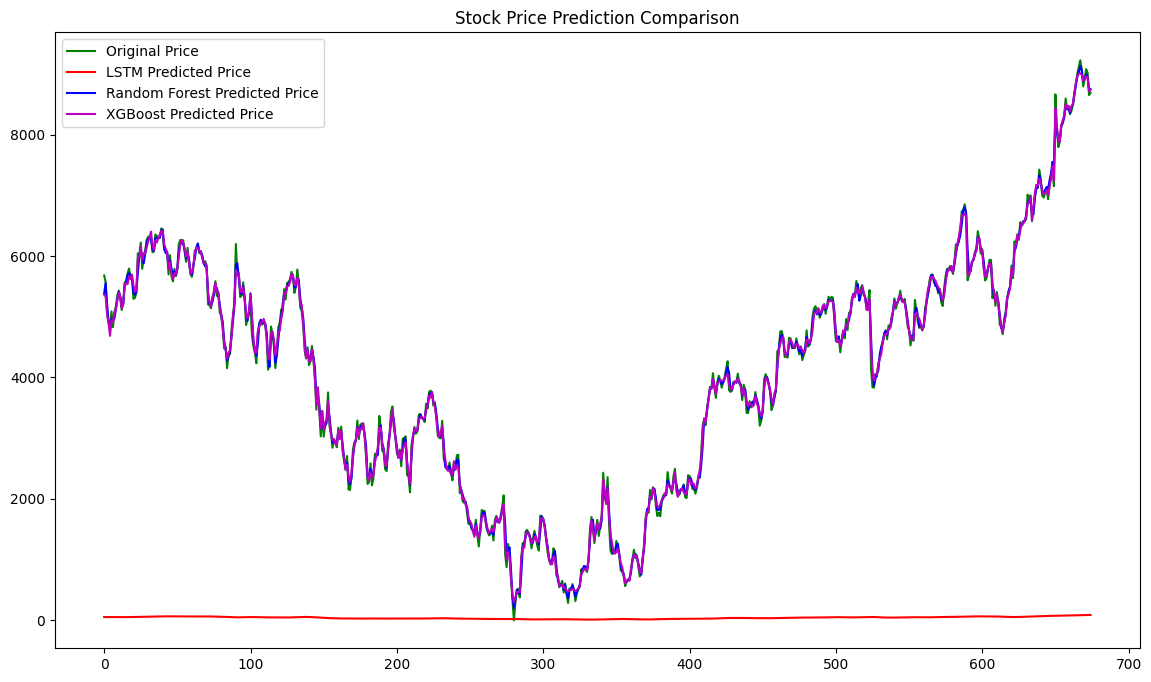

In [51]:
plt.figure(figsize=(14, 8))

plt.plot(y_test_rescaled, 'g', label='Original Price')
plt.plot(y_predict, 'r', label='LSTM Predicted Price')
plt.plot(y_pred_rf_rescaled, 'b', label='Random Forest Predicted Price')
plt.plot(y_pred_xgb_rescaled, 'm', label='XGBoost Predicted Price')

plt.xlabel=('Time')
plt.ylabel=('Price')
plt.legend()
plt.title('Stock Price Prediction Comparison')
plt.show()

In [82]:
model.save('Stock prediction model.keras')

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [53]:
mse_lstm = mean_squared_error(y_test_rescaled, y_predict)
mae_lstm = mean_absolute_error(y_test_rescaled, y_predict)
r2_lstm = r2_score(y_test_rescaled, y_predict)

In [54]:
mse_rf = mean_squared_error(y_test_rescaled, y_pred_rf_rescaled)
mae_rf = mean_absolute_error(y_test_rescaled, y_pred_rf_rescaled)
r2_rf = r2_score(y_test_rescaled, y_pred_rf_rescaled)

In [55]:
mse_xgb = mean_squared_error(y_test_rescaled, y_pred_xgb_rescaled)
mae_xgb = mean_absolute_error(y_test_rescaled, y_pred_xgb_rescaled)
r2_xgb = r2_score(y_test_rescaled, y_pred_xgb_rescaled)

In [56]:
print(f'LSTM Mean Squared Error: {mse_lstm}')
print(f'LSTM Mean Absolute Error: {mae_lstm}')
print(f'LSTM R-squared: {r2_lstm}')

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest Mean Absolute Error: {mae_rf}')
print(f'Random Forest R-squared: {r2_rf}')

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

LSTM Mean Squared Error: 20030651.709977467
LSTM Mean Absolute Error: 4015.908216967791
LSTM R-squared: -4.04406227514299
Random Forest Mean Squared Error: 9251.036316275324
Random Forest Mean Absolute Error: 68.74233128756757
Random Forest R-squared: 0.9976704301006013
XGBoost Mean Squared Error: 7190.093019308427
XGBoost Mean Absolute Error: 63.01157464845297
XGBoost R-squared: 0.9981894110347195
